# Tutorial 1.1 
## How to use RGB Seleting Function with 2MASS/Gaia DR2 Data
Author: Anastasios (Andy) Tzanidakis
Columbia University, New York

Contact: at3156@columbia.edu

In [1]:
import matplotlib.pyplot as plt
from astropy.io import ascii
%matplotlib inline

In [2]:
# RGB Star Selecting function 
from RGB_pipeline import rgb

In [3]:
# datapath
data_path = 'gaia2MASS_sample.csv'
# Load data 
data_test = ascii.read(data_path)

In [4]:
# View the raw astropy table that we have just loaded
data_test

source_id,ra,dec,parallax,parallax_error,pmra,pmra_error,pmdec,pmdec_error,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,tmass_oid,j_m,h_m,ks_m,j_msigcom,h_msigcom,ks_msigcom
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64
853471849244539904,158.19907235069073,54.84611909722335,0.6457061678972248,0.15079647385304354,-2.164834224465418,0.16779183929771824,-8.666922242759286,0.2822771912800557,17.48115,17.740953,16.991072,440163302,16.585,16.19,15.522,0.145,0.2,--
853541947406479744,158.26593562467318,55.35971573170396,0.8146031077626624,0.07291789071204319,-8.058321254772189,0.08080534331873265,0.2477227441667279,0.1352096814770408,16.38071,16.808348,15.801461,441313579,15.09,14.801,14.546,0.046,0.058,0.075
853566647762900352,158.43060834241976,55.647909847992636,1.8725893984486295,0.36204069628912605,-4.972752713956261,0.4464772011362445,-31.69793635227694,0.6274979504013742,19.094976,20.486397,17.861855,441960427,16.234,15.728,15.67,0.1,0.164,0.192
853589123327286272,159.55551789133142,55.58991079515646,2.7321735880381386,0.20895723752722098,-12.287669662364761,0.2127164873187866,-33.73692276393092,0.29104727920765106,18.073748,19.507917,16.916769,441830305,15.306,14.77,14.611,0.056,0.073,0.098
853481126374002944,158.61085809286595,55.08783041870703,3.6372184229297666,0.46143093665801677,8.103911952123438,0.4772381530099785,3.553099868563862,0.7972607816303592,19.265581,20.877083,17.943897,440705516,16.086,15.335,15.102,0.086,0.104,0.109
853458659400731264,157.77886322969965,54.75301079799344,1.3162084441101964,0.0658115814422006,9.059418922794379,0.08051547904775,-16.141389245067316,0.09522082384157327,16.409018,17.204247,15.535791,439953024,14.43,13.764,13.657,0.032,0.041,0.041
853626850320016256,159.55500419216088,55.764375753596376,0.6931753089106711,0.2580970947290171,-0.6295338523941485,0.30481415725449595,-26.35999611041969,0.39772913305192864,18.756765,19.583235,17.758757,442220495,16.434,15.973,15.338,0.137,0.193,--
853471505647405312,158.44093315583854,54.95830945870454,5.030747353760412,0.5999452993004718,10.517118282489674,0.5960417738621454,-34.850525555526815,0.9135548931205779,19.564766,21.225815,18.175722,440415576,16.178,15.655,15.074,0.099,0.141,0.118
853627056478446336,159.56458073503262,55.7785082409671,1.150282009114555,0.35608753277253186,-27.973667414840236,0.4495735889757932,-18.484752044598814,0.5267467236656682,19.251736,20.575783,17.987505,442251943,16.429,15.411,15.708,0.13,0.122,0.252


Text(0,0.5,'$k_s$')

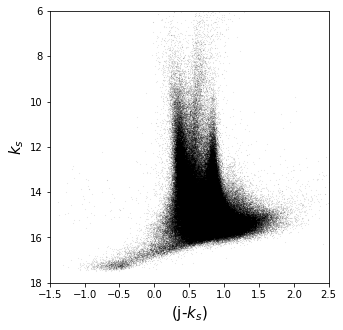

In [5]:
_, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))

ax.scatter((data_test['j_m']-data_test['ks_m']),data_test['ks_m'], s=0.001, color='k')
ax.set_ylim(ax.set_ylim(6,18)[::-1])
ax.set_xlim(-1.5, 2.5)
ax.set_xlabel('(j-$k_s$)', size=15)
ax.set_ylabel('$k_s$', size=15)


First, let's take a view the color-magnitude diagram (CMD) of the original queried data from 2MASS crossmatched with Gaia DR2. 

In the particular figure seen above, we note that this is an arbitrary selected filed in Galactic coordinates. The most striking thing is to note several stellar populations in-situ the CMD. In order to properly analyze a specific stellar population, we follow the following method: 

 - Correct for dust exctinction in the particular field using `RGB_pipeline.dust_correction()` function
 - For given photometric limits in 2MASS (i.e $K_s$, $(J-K_s)$) we can use the `RGB_pipeline.rgb_select()` function to select in our __extinction corrected__ data the Red Giants

In [6]:
rgb_stars = rgb(data_test) # create rgb_star object

corr_stars = rgb_stars.dust_correction(r_ks=0.306, r_j=0.72, r_h=0.46) # correct for exctinction for 2MASS bandpass

rgb_sample = rgb_stars.rgb_select(corr_stars,JKs0=0.85, up_ks0=9.5, down_ks0=12.5)  # Select RGB stars

/Users/iraf1/anaconda/envs/py36/lib/python3.6/site-packages/astropy/coordinates/baseframe.py:128: AstropyDeprecationWarning: The `representation` keyword/property name is deprecated in favor of `representation_type`
  'favor of `representation_type`', AstropyDeprecationWarning)



Text(0,0.5,'$N$')

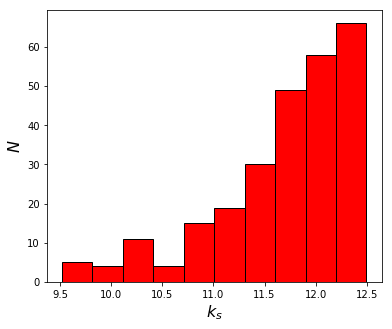

In [54]:
_, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,5))
ax.hist(rgb_sample['ks0'], bins=10, color='red', edgecolor='k', histtype='bar')
ax.set_xlabel('$k_s$', size=16)
ax.set_ylabel('$N$', size=16)